# 分层索引

Hierarchical Indexing是pandas中一个重要的特性，能让我们在一个轴（axis）上有多个index levels（索引层级）。它可以让我们在低维格式下处理高维数据。这里给出一个简单的例子，构建一个series，其index是a list of lists:

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [3]:
data

a  1    1.010322
   2    1.237959
   3    1.336982
b  1   -0.220382
   3    0.580349
c  1    0.016795
   2    1.306786
d  2    0.133954
   3   -0.898057
dtype: float64

In [4]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

In [5]:
data['b']

1   -0.220382
3    0.580349
dtype: float64

In [6]:
data['b': 'c']

b  1   -0.220382
   3    0.580349
c  1    0.016795
   2    1.306786
dtype: float64

In [7]:
data.loc[['b', 'd']]

b  1   -0.220382
   3    0.580349
d  2    0.133954
   3   -0.898057
dtype: float64

在“内部”层级中进行选择也是可以的

In [10]:
data.loc[:, 2]

a    1.237959
c    1.306786
d    0.133954
dtype: float64

可以使用unstack方法将数据在DataFrame中重新排列

In [11]:
data.unstack()

,1,2,3
a,1.010322,1.237959,1.336982
b,-0.220382,NaN,0.580349
c,0.016795,1.306786,NaN
d,NaN,0.133954,-0.898057


In [13]:
data.unstack().stack()    #  反操作

a  1    1.010322
   2    1.237959
   3    1.336982
b  1   -0.220382
   3    0.580349
c  1    0.016795
   2    1.306786
d  2    0.133954
   3   -0.898057
dtype: float64

每个层都可以有分层索引

In [14]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

每个层级都可以有名字

In [15]:
frame.index.names = ['key1', 'key2']

In [16]:
frame.columns.names = ['state', 'color']

In [17]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [18]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

一个Mu;tiIndex对象可以使用其自身的构造函数创建并复用。前面介绍的带有层级名称的列可以这样创建

In [19]:
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
                      names=['state', 'color'])

MultiIndex(levels=[['Colorado', 'Ohio'], ['Green', 'Red']],
           codes=[[1, 1, 0], [0, 1, 0]],
           names=['state', 'color'])

## 重排序和层级排序

In [20]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

sort_index只能在单一层级上对数据进行排序。在进行层级变换时，使用sort_index以使得结果按照层级进行字典排序也很常见

In [21]:
frame.sort_index(level = 1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [22]:
frame.swaplevel(0,1).sort_index(level = 0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

## 按层级进行汇总统计

DataFrame和Series中很多描述性和汇总性统计有一个level选项，通过level选项可以指定你想要在某个特定轴上进行聚合

In [23]:
frame.sum(level = 'key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [24]:
frame.sum(level = 'color', axis = 1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

## 使用DataFrame的列进行索引

通常我们不会使用DataFrame中的一个或多个列作为行索引；反而想把行索引移动到DataFrame的列中

In [25]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [26]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

默认删除原先的列，当然我们也可以留着：

In [27]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

另一方面，reset_index的功能与set_index相反，它会把多层级索引变为列：

In [28]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


# 联合与合并数据集

pandas.merge根据一个或多个键将行进行连接。

pandas.concat使对象在轴向上进行粘合或堆叠

combine_first允许将重叠的数据拼接在一起，以使用一个对象中的值填充另一个对象中的缺失值

## 数据库风格的DataFrame连接


In [29]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [30]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [31]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


如果连接的键信息没有指定。merge会自动将重叠列名作为连接的键。但是，显式地指定连接键才是最好地实现

In [32]:
pd.merge(df1,df2,on = 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


如果每个对象的列明是不同地，可以分别为它们指定列名

In [33]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                             'data1': range(7)})

df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'], 
                             'data2': range(3)})

In [35]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')  # 默认内连接

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [36]:
pd.merge(df1,df2,how = 'outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


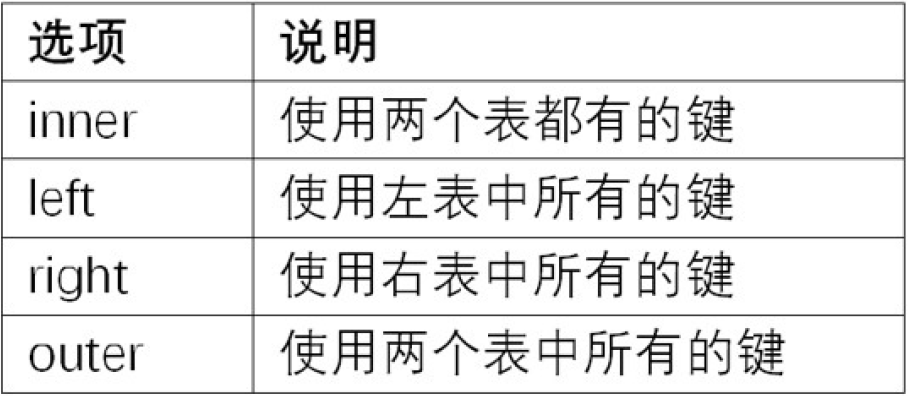

In [37]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [38]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 
                    'data1': range(6)})

df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [39]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'], 
                    'data2': range(5)})
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [40]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


处理重叠列名

In [41]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'], 
                     'key2': ['one', 'two', 'one'], 
                     'lval': [1, 2, 3]})

right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'], 
                      'key2': ['one', 'one', 'one', 'two'], 
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


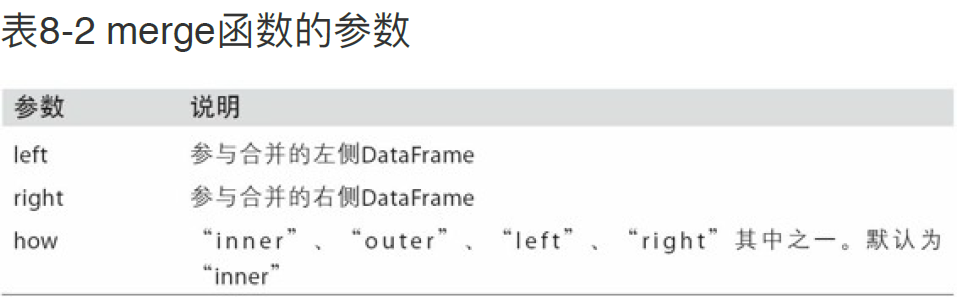

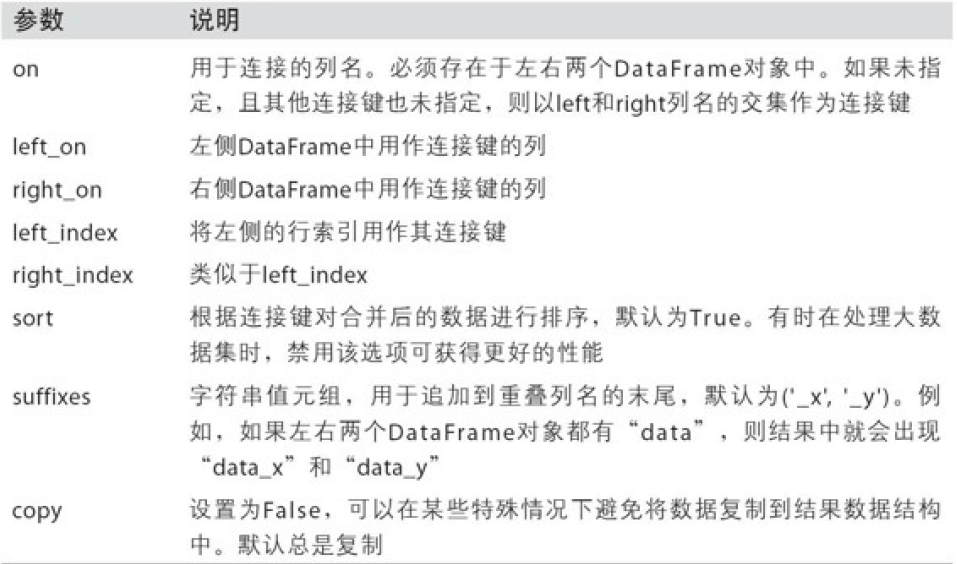

## 根据索引合并

In [42]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'], 
                      'value': range(6)})

left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [43]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
right1

,group_val
a,3.5
b,7.0


In [44]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [45]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


在多层索引数据情况下，在索引上连接时一个隐式的多键合并

In [46]:
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 
                              'Ohio', 'Ohio'], 
                             [2001, 2000, 2000, 2000, 2001, 2002]], 
                      columns=['event1', 'event2'])
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [47]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'], 
                      'key2': [2000, 2001, 2002, 2001, 2002], 
                      'data': np.arange(5.)})
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [48]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], 
         right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


在这个例子里，我们必须指明将多列归并作为一个list（注意处理重复index的方法是令how='outer'）:

In [49]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


也可以使用两边的索引进行合并

In [50]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], 
                     index=['a', 'c', 'e'], 
                     columns=['Ohio', 'Nevada'])

left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [51]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]], 
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [52]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


DataFrame有一个很便利的join实例，可以直接用index来连接。这个也可以用于与其他DataFrame进行连接，要有一样的index但不能有重叠的列：

In [53]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


对于一些简单索引-索引合并，可以用join方法传入一个DataFrame列表

In [54]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]], 
                       index=['a', 'c', 'e', 'f'], 
                       columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [55]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [56]:
left2.join([right2, another], how='outer')

D:\anaconda\lib\site-packages\pandas\core\frame.py:6848: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


## 沿轴向连接

另一种数据组合操作可互换地称为拼接、绑定或堆叠。NumPy的concatenate函数可以实现这一功能

In [57]:
arr = np.arange(12).reshape((3,4))

In [58]:
np.concatenate([arr,arr],axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [59]:
s1 = pd.Series([0, 1], index=['a', 'b'])

s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

s3 = pd.Series([5, 6], index=['f', 'g'])

In [60]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

默认情况下，concat是在axis=0上⼯作的，最终产⽣⼀个新的
Series。如果传⼊axis=1，则结果就会变成⼀个
DataFrame（axis=1是列）：

In [61]:
pd.concat([s1, s2, s3], axis=1)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [62]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [63]:
pd.concat([s1, s4], axis=1)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [64]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


因为join='inner'，所以f和g标签消失了。

你也可以在join_axes中指定使用哪些轴：

In [66]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


一个潜在的问题是串联的部分在结果里是不可辨识的。假设我们想在串联轴上创建一个多层级索引，我们需要用到keys参数：

In [67]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [68]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


如果是设定axis=1，那么keys会变为DataFrame的column header(列头):

In [69]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


相同的逻辑：

In [70]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'], 
                   columns=['one', 'two'])

df1

,one,two
a,0,1
b,2,3
c,4,5


In [71]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], 
                   columns=['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [72]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

如果导入一个dict而不是list，那么dict的key会被用于上面concat中的keys选项：

In [73]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

还有其他一些选项负责多层级索引的设定。比如，可以给创建的axis level(轴层级)用names参数来命名：

In [74]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

在DataFrame中，行索引（row index）没有包含相关的数据：

In [75]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df1

,a,b,c,d
0,0.036390,-0.494517,1.664643,-1.387983
1,-0.538496,-0.659706,-0.280284,-0.805721
2,0.613818,-1.010220,-0.446946,-0.802813


In [76]:
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df2

,b,d,a
0,-0.022468,-1.055480,2.033240
1,0.408640,1.682689,1.027445


In [77]:
pd.concat([df1, df2], ignore_index=True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,0.036390,-0.494517,1.664643,-1.387983
1,-0.538496,-0.659706,-0.280284,-0.805721
2,0.613818,-1.010220,-0.446946,-0.802813
3,2.033240,-0.022468,NaN,-1.055480
4,1.027445,0.408640,NaN,1.682689


In [78]:
pd.concat([df1, df2])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,0.036390,-0.494517,1.664643,-1.387983
1,-0.538496,-0.659706,-0.280284,-0.805721
2,0.613818,-1.010220,-0.446946,-0.802813
0,2.033240,-0.022468,NaN,-1.055480
1,1.027445,0.408640,NaN,1.682689


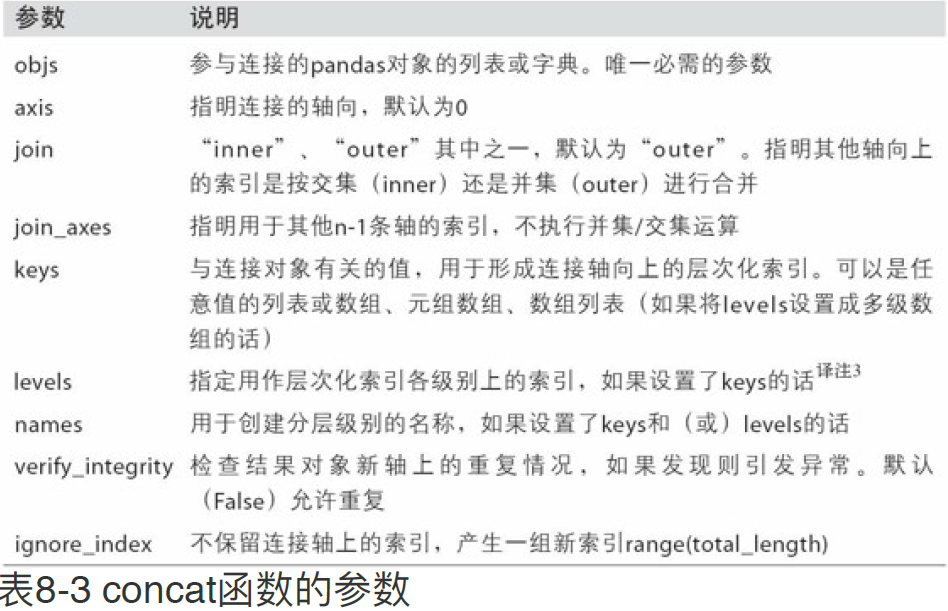

## 联合重叠数据

另一种数据合并方法既不属于merge，也不属于concatenation。比如两个数据集，index可能完全覆盖，或覆盖一部分。这里举个例子，考虑下numpy的where函数，可以在数组上进行类似于if-else表达式般的判断：

In [79]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], 
              index=['f', 'e', 'd', 'c', 'b', 'a'])

a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [80]:
b = pd.Series(np.arange(len(a), dtype=np.float64), 
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [81]:
np.where(pd.isnull(a), b, a)#判断，如果为0则后者，1 为前者

array([0. , 2.5, 2. , 3.5, 4.5, 5. ])

Series有一个combine_first方法，效果和上面是一样，而且还会自动对齐（比如把index按字母进行排列）：

In [82]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

对于DataFrame， combine_first可以在列与列之间做到同样的事情，可以认为是用传递的对象，给调用对象中的缺失值打补丁：

In [83]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan], 
                    'b': [np.nan, 2., np.nan, 6.], 
                    'c': range(2, 18, 4)})

df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [84]:
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.], 
                    'b': [np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [85]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


# 重塑与透视

## 使用多层索引进行重塑

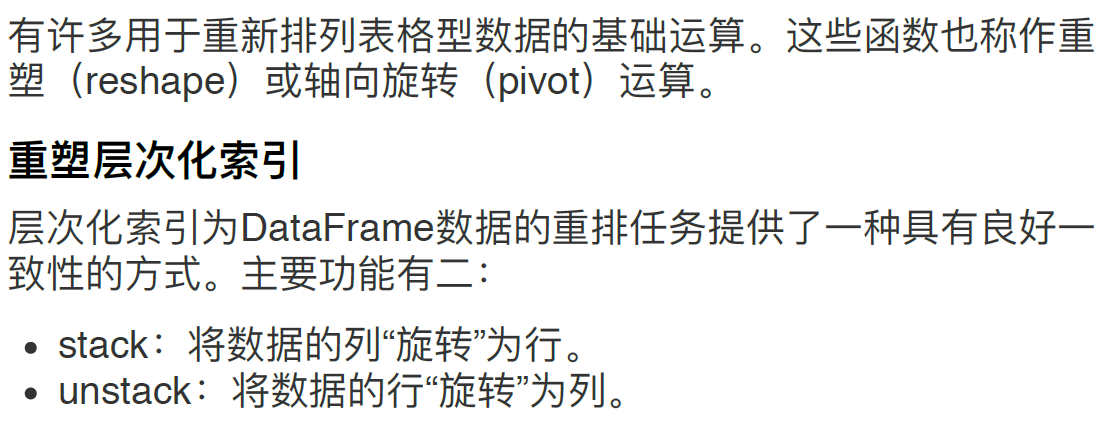

In [86]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'), 
                    columns=pd.Index(['one', 'two', 'three'], 
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


使用stack方法会把列数据变为行数据，产生一个Series：

In [87]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

对于一个有多层级索引的Series，可以用unstack把它变回DataFrame：

In [88]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


默认情况下，最内层是已拆堆的，可以传入一个层级序号或名称来拆分一个不同的层级

In [89]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [90]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


如果某个层级里的值不能在subgroup(子组)里找到的话，unstack可能会引入缺失值：

In [91]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])

s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])

data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [92]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [93]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


stack默认会把缺失值过滤掉，所以这两种操作是可逆的：

In [94]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [95]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [96]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

如果对一个DataFrame使用unstack，被取消堆叠（unstack）的层级会变为结果中最低的层级：

In [97]:
df = pd.DataFrame({'left': result, 'right': result + 5}, 
                  columns=pd.Index(['left', 'right'], name='side'))
df # 行的话，有state和number两个层级，number是内层级。而列的话有side这一个层级

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [98]:
df.unstack('state')  # state被unstack后，变为比side更低的层级

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

调用stack的时候，可以指明想要stack（堆叠）哪一个轴：

In [99]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

## 将长透视成宽

In [100]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [101]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')

In [102]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')

In [103]:
data = data.reindex(columns=columns)

In [104]:
data.index = periods.to_timestamp('D', 'end')

In [105]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [106]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [108]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted[:10]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
1960-06-30 23:59:59.999999999,0.14,2834.390,5.2
1960-09-30 23:59:59.999999999,2.70,2839.022,5.6
1960-12-31 23:59:59.999999999,1.21,2802.616,6.3
1961-03-31 23:59:59.999999999,-0.40,2819.264,6.8


In [109]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                
item                           infl   realgdp unemp
date                                               
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2

In [110]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [111]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                
item                           infl   realgdp unemp
date                                               
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6

## 将宽透视成长

In [112]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'], 
                   'A': [1, 2, 3], 
                   'B': [4, 5, 6], 
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [113]:
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [114]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [115]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [116]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [117]:
pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [118]:
pd.melt(df, value_vars=['key','A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6
